In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

In [43]:
df = pd.read_csv('Spamsms.csv', sep='\t', names=['Label','SMS'], encoding='latin-1')

In [44]:
df

,Label,SMS
0,"v1,v2,,,",NaN
1,"ham,""Go until jurong point, crazy.. Available ...",NaN
2,"ham,Ok lar... Joking wif u oni...,,,",NaN
3,"spam,Free entry in 2 a wkly comp to win FA Cup...",NaN
4,"ham,U dun say so early hor... U c already then...",NaN
...,...,...
5570,"spam,""This is the 2nd time we have tried 2 con...",NaN
5571,"ham,Will Ì_ b going to esplanade fr home?,,,",NaN
5572,"ham,""Pity, * was in mood for that. So...any ot...",NaN
5573,"ham,The guy did some bitching but I acted like...",NaN


In [5]:
df['label']=df.Label.map({'ham':0, 'spam':1})

In [6]:
df.head()

,Label,SMS,label
0,"v1,v2,,,",NaN,NaN
1,"ham,""Go until jurong point, crazy.. Available ...",NaN,NaN
2,"ham,Ok lar... Joking wif u oni...,,,",NaN,NaN
3,"spam,Free entry in 2 a wkly comp to win FA Cup...",NaN,NaN
4,"ham,U dun say so early hor... U c already then...",NaN,NaN


In [7]:
df.shape

(5575, 3)

In [8]:
df.describe()

,SMS,label
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [9]:
df.groupby('Label').describe()

SMS                       \
                                                   count mean std min 25% 50%   
Label                                                                           
ham""",,,                                            0.0  NaN NaN NaN NaN NaN   
ham""",Well there's still a bit left if you guy...   0.0  NaN NaN NaN NaN NaN   
ham, &lt;#&gt;  in mca. But not conform.,,,          0.0  NaN NaN NaN NaN NaN   
ham, &lt;#&gt;  mins but i had to stop somewher...   0.0  NaN NaN NaN NaN NaN   
ham, &lt;DECIMAL&gt; m but its not a common car...   0.0  NaN NaN NaN NaN NaN   
...                                                  ...  ...  ..  ..  ..  ..   
spam,todays vodafone numbers ending with 0089(m...   0.0  NaN NaN NaN NaN NaN   
spam,u r a winner U ave been specially selected...   0.0  NaN NaN NaN NaN NaN   
spam,wamma get laid?want real doggin locations ...   0.0  NaN NaN NaN NaN NaN   
spam,we tried to contact you re your response t...   0.0  NaN NaN NaN NaN NaN   
v1,v2,,,                                             0.0  NaN NaN NaN NaN NaN   

                                                           label               \
                                                   75% max count mean std min   
Label                                                                           
ham""",,,                                          NaN NaN   0.0  NaN NaN NaN   
ham""",Well there's still a bit left if you guy... NaN NaN   0.0  NaN NaN NaN   
ham, &lt;#&gt;  in mca. But not conform.,,,        NaN NaN   0.0  NaN NaN NaN   
ham, &lt;#&gt;  mins but i had to stop somewher... NaN NaN   0.0  NaN NaN NaN   
ham, &lt;DECIMAL&gt; m but its not a common car... NaN NaN   0.0  NaN NaN NaN   
...                                                 ..  ..   ...  ...  ..  ..   
spam,todays vodafone numbers ending with 0089(m... NaN NaN   0.0  NaN NaN NaN   
spam,u r a winner U ave been specially selected... NaN NaN   0.0  NaN NaN NaN   
spam,wamma get laid?want real doggin locations ... NaN NaN   0.0  NaN NaN NaN   
spam,we tried to contact you re your response t... NaN NaN   0.0  NaN NaN NaN   
v1,v2,,,                                           NaN NaN   0.0  NaN NaN NaN   

                                                                    
                                                   25% 50% 75% max  
Label                                                               
ham""",,,                                          NaN NaN NaN NaN  
ham""",Well there's still a bit left if you guy... NaN NaN NaN NaN  
ham, &lt;#&gt;  in mca. But not conform.,,,        NaN NaN NaN NaN  
ham, &lt;#&gt;  mins but i had to stop somewher... NaN NaN NaN NaN  
ham, &lt;DECIMAL&gt; m but its not a common car... NaN NaN NaN NaN  
...                                                 ..  ..  ..  ..  
spam,todays vodafone numbers ending with 0089(m... NaN NaN NaN NaN  
spam,u r a winner U ave been specially selected... NaN NaN NaN NaN  
spam,wamma get laid?want real doggin locations ... NaN NaN NaN NaN  
spam,we tried to contact you re your response t... NaN NaN NaN NaN  
v1,v2,,,                                           NaN NaN NaN NaN  

[5172 rows x 16 columns]

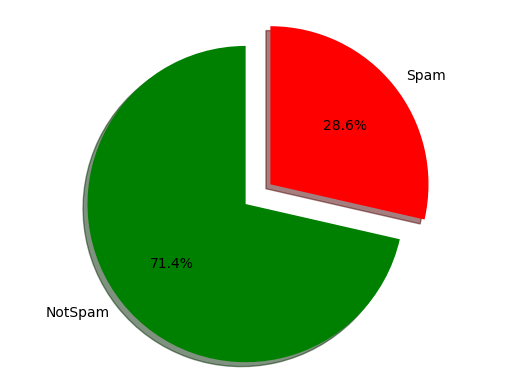

In [10]:
count_Class=pd.value_counts(df.Label, sort = True)
labels = "NotSpam", "Spam"
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True,startangle = 90)
plt.axis('equal')
plt.show()

In [11]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print('The original documents',documents)
print()
print('After lower case process',lower_case_documents)

The original documents ['Hello, how are you!', 'Win money, win from home.', 'Call me now.', 'Hello, Call hello you tomorrow?']

After lower case process ['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [12]:
import string
sans_punctuation_documents = []
for i in lower_case_documents:
    translator = str.maketrans('', '', string.punctuation)
    sans_punctuation_documents.append(i.translate(translator))
print('After remove puctuation',sans_punctuation_documents)

After remove puctuation ['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


In [13]:
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))
print('Tokenization split into word',preprocessed_documents)

Tokenization split into word [['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


In [14]:
frequency_list = []
import pprint
from collections import Counter
for i in preprocessed_documents:
    frequency = Counter(i)
    frequency_list.append(frequency)
    
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)
count_vector.fit(documents)
count_vector.get_feature_names_out()

CountVectorizer()


array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [16]:
doc_array = count_vector.transform(documents).toarray()
print("Doc array: \n", doc_array)

Doc array: 
 [[1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 1 0 0 2 0]
 [0 1 0 0 0 0 1 0 1 0 0 0]
 [0 1 0 2 0 0 0 0 0 1 0 1]]


In [17]:
frequency_matrix = pd.DataFrame(doc_array,columns = count_vector.get_feature_names_out())
print(frequency_matrix)

   are  call  from  hello  home  how  me  money  now  tomorrow  win  you
0    1     0     0      1     0    1   0      0    0         0    0    1
1    0     0     1      0     1    0   0      1    0         0    2    0
2    0     1     0      0     0    0   1      0    1         0    0    0
3    0     1     0      2     0    0   0      0    0         1    0    1


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['SMS'], 
                                                    df['Label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5575
Number of rows in the training set: 4181
Number of rows in the test set: 1394


In [19]:

X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]


In [20]:

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)

In [21]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [22]:
predictions = naive_bayes.predict(testing_data)

In [23]:
new_test_sample_ham = ["I'm deepshikhaa"]

In [24]:
new_test_sample_spam = ["Congratulations, you've won a free Sony Camera"]

In [25]:
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)

In [26]:
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)

In [27]:
sample_predict = naive_bayes.predict(new_test_sample_ham_vectorized)

In [28]:
sample_predict

array(['ham,"Sorry, I\'ll call later",,,'], dtype='<U917')

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, predictions)

conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.005738880918220947
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

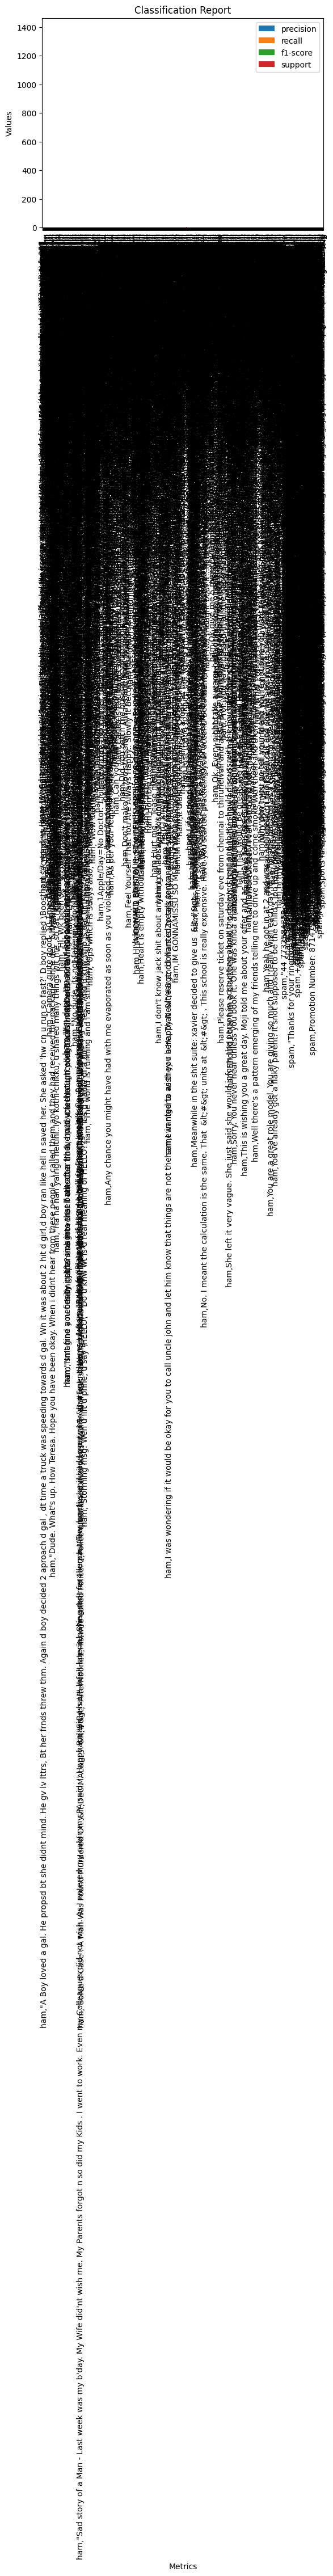

In [30]:
report = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.plot(kind='bar')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Classification Report')
plt.show()

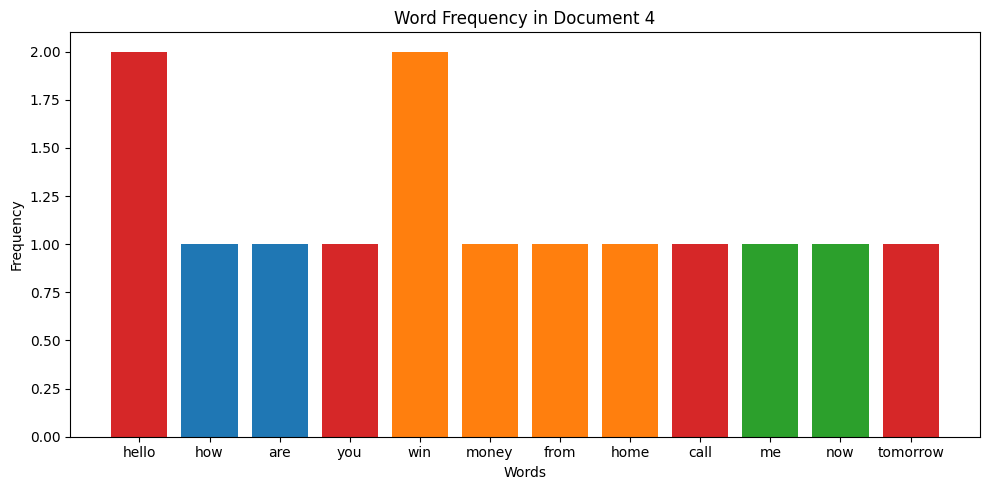

In [31]:
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessed text data
documents = ['Hello, how are you!', 'Win money, win from home.', 'Call me now.', 'Hello, Call hello you tomorrow?']

# Preprocess the documents
lower_case_documents = [doc.lower() for doc in documents]
sans_punctuation_documents = [doc.translate(str.maketrans('', '', string.punctuation)) for doc in lower_case_documents]
preprocessed_documents = [doc.split() for doc in sans_punctuation_documents]

# Calculate word frequency
frequency_list = [Counter(doc) for doc in preprocessed_documents]

# Visualize word frequency as a bar chart
plt.figure(figsize=(10, 5))
for i, frequency in enumerate(frequency_list, start=1):
    words, counts = zip(*frequency.items())
    plt.bar(words, counts)
    plt.title("Word Frequency in Document {}".format(i))
    plt.xlabel("Words")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


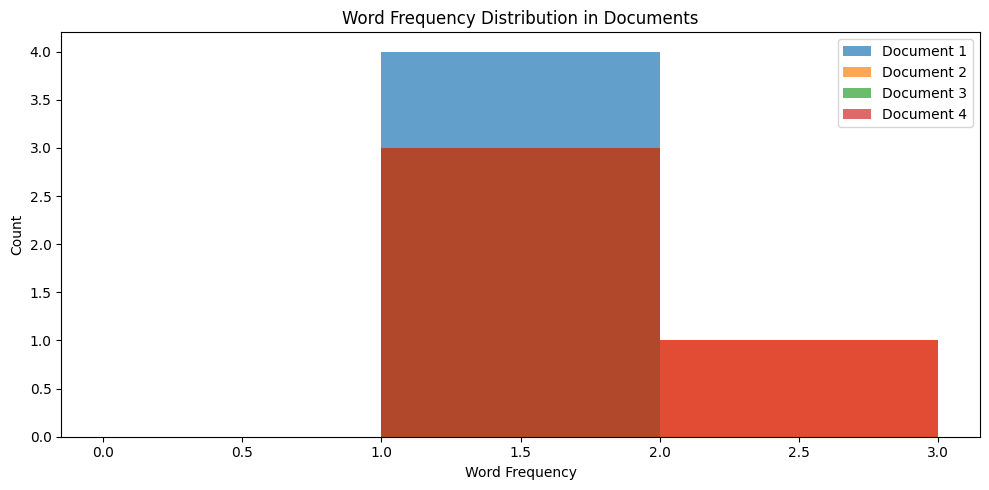

In [32]:
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessed text data
documents = ['Hello, how are you!', 'Win money, win from home.', 'Call me now.', 'Hello, Call hello you tomorrow?']

# Preprocess the documents
lower_case_documents = [doc.lower() for doc in documents]
sans_punctuation_documents = [doc.translate(str.maketrans('', '', string.punctuation)) for doc in lower_case_documents]
preprocessed_documents = [doc.split() for doc in sans_punctuation_documents]

# Calculate word frequency
frequency_list = [Counter(doc) for doc in preprocessed_documents]

# Visualize word frequency distribution as histograms
plt.figure(figsize=(10, 5))
for i, frequency in enumerate(frequency_list, start=1):
    words, counts = zip(*frequency.items())
    plt.hist(counts, bins=range(max(counts) + 2), alpha=0.7, label="Document {}".format(i))
    plt.title("Word Frequency Distribution in Documents")
    plt.xlabel("Word Frequency")
    plt.ylabel("Count")
    plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

# ... (Previous code)

# Predictions
predictions = naive_bayes.predict(testing_data)

# Map numeric labels to "ham" or "spam"
label_mapping = {0: "ham", 1: "spam"}
y_test_mapped = y_test.map(label_mapping)
predictions_mapped = pd.Series(predictions).map(label_mapping)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)



NameError: name 'naive_bayes' is not defined